# EDA - Titanic Dataset

**<div style="text-align: right">Update date: April 26, 2023.</div>**
**<div style="text-align: right">Copyright(c) 2021-2022 Youngmin Park All rights reserved.</div>**

# 1912년 타이타닉 사고 데이터 EDA
#### 탐색적 데이터 분석 (EDA)를 통해 아래 목표를 달성해봅시다 
- 주어진 각 feature들의 분포 살펴보기, 생존자/사망자 별로 데이터 분리하여 살펴보기
- 어떤 정보를 통해 **생존율을 예측**할 수 있을 지, 가설을 세우고 실제 그래프로 검증해봅시다.

### [ 데이터 설명 ]
- 891명의 승객에 대한 데이터.  생존여부 / 좌석 등급 / 성별 / 나이 / 일행 / 자녀 / 운임 등의 feature

|Feature|	Definition|	Value|
|------|---------|------------|
|survived|	생존 여부|	0 = No, 1 = Yes|
|pclass|	티겟 등급 (1등석, 2등석, 3등석)|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	성별	| male 남성,  female 여성
|age|	나이  |	((숫자))
|sibsp|	함께 탑승한 배우자, 형제자매의 수 합	|   ((숫자))
|parch|	함께 탑승한 부모님, 자녀의 수 합	|   ((숫자))
|fare|	운임 요금 (티켓 가격)	|   ((숫자))
|embarked|	출항지 (한글자)	|C = Cherbourg, Q = Queenstown, S = Southampton|
|class|	티켓 등급 (단어로)	|  First, Second, Third
|who|	남성/여성/아이 구분	|    man, woman, child
|adult_male|	성인 남성인지의 여부	|    True, False
|deck|	선박에서 배정받은 좌석의 구역	|    A, B, C, D, E, F, G, 빈 값
|embark_town|	출항지 (풀네임)	|   ((도시이름))
|alive|	생존 여부	|    yes, no
|alone|	혼자인지 여부	|    True, False

##한글 폰트 설치

## 라이브러리 임포트

In [16]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# plt.rc('font', family='NanumBarunGothic')
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)

plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

## 데이터 불러오기

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## EDA 탐색적 데이터 분석 수행하기

 .info() 함수로 데이터 컬럼별 타입(자료형), 값이 있는 행(Non-Null)의 갯수 등을 알 수 있습니다.

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


범주형 컬럼과, 수치형 컬럼으로 나누어서 리스트를 만듭니다. (추후 분석 시 반복되는 코드를 줄일 수 있어요)  
* 범주형 데이터은 값이 [1, 2, 3], ["내부", "외부"]와 같이 몇 가지 분류로 한정되는 데이터 입니다.
* 수치형 데이터는 값이 1,2,3,5,..., 1.2, 4.51, 3.1415와 같이 숫자 축으로 무한히 위치할 수 있는 데이터 입니다.

In [6]:
category_cols = ["sex","embarked","class","who","adult_male","deck","embark_town","alive","alone"]

In [7]:
numerical_cols = ["age","sibsp","parch","fare"]

#### 데이터의 통계량 살펴보기  
.describe() 함수로 각 열에 대한 대략적인 통계 값들을 볼 수 있습니다. (평균, 상위 25/50/75% 값, 최대/최소 값 등)

In [8]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


.value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있습니다

In [9]:
for col in category_cols:
    print(col + " 카운트::")
    print(titanic_df.loc[:, col].value_counts())
    print()

sex 카운트::
sex
male      577
female    314
Name: count, dtype: int64

embarked 카운트::
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

class 카운트::
class
Third     491
First     216
Second    184
Name: count, dtype: int64

who 카운트::
who
man      537
woman    271
child     83
Name: count, dtype: int64

adult_male 카운트::
adult_male
True     537
False    354
Name: count, dtype: int64

deck 카운트::
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

embark_town 카운트::
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

alive 카운트::
alive
no     549
yes    342
Name: count, dtype: int64

alone 카운트::
alone
True     537
False    354
Name: count, dtype: int64



#### 데이터의 분포 눈으로 살펴보기

수치형 컬럼들의 분포를 그려봅시다. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그립니다.  
* 본격적으로 반복문을 사용해 볼까요? 이 코드에서는 반복문을 이용하여 여러개의 차트를 그립니다.
* plt.subplots를 통해 여러 개의 도화지를 생성합니다. (nrows × ncols)
* for문 안에서는 각 도화지(ax)에 seaborn으로 차트를 그립니다. figure는 그림 전체를 의미합니다.

In [10]:
numerical_cols

['age', 'sibsp', 'parch', 'fare']

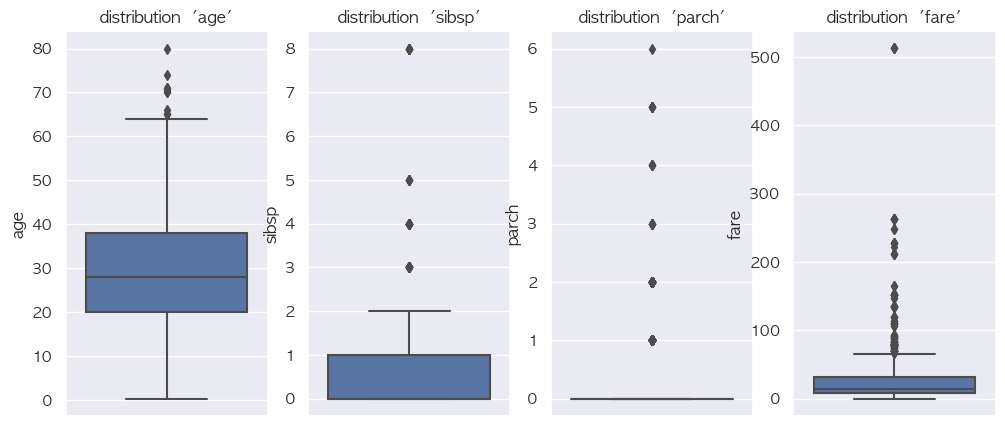

In [17]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,5)

for i in range(4):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

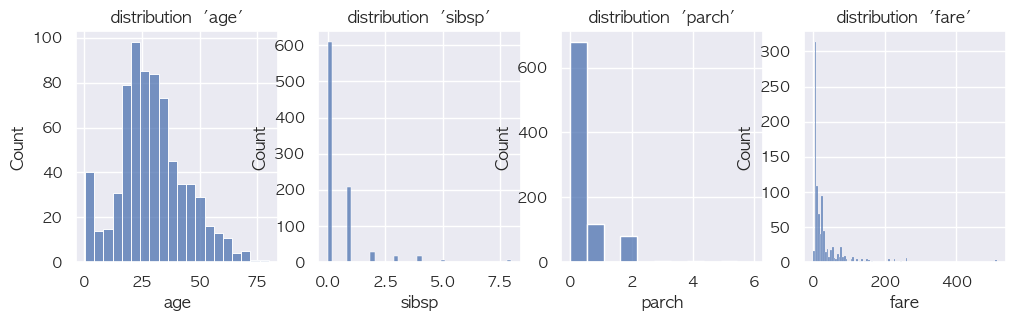

In [18]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(12,3)

for i in range(4):
    sns.histplot(data=titanic_df.loc[:, numerical_cols[i]], ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{numerical_cols[i]}'")

범주형 컬럼들의 분포를 그려봅니다. 범주형이므로 countplot을 통해 각 범주별로 개수를 셀 수 있습니다.  
* 범주형 컬럼이 총 9개 이므로, 3x3 도화지 레이아웃으로 하나씩 그래프를 그려봅니다.
* ax_list_list는 [[], []] 형태의 2차원 리스트 입니다. for 문으로 반복하기 위해 1차원 리스트로 풀어줍니다.
* 1차원 리스트 ax_list가 9개의 도화지 (ax)를 갖도록 풀어서 할당하는데, `.reshape()` 라는 numpy 함수를 사용합니다.

(3, 3)
(9,)


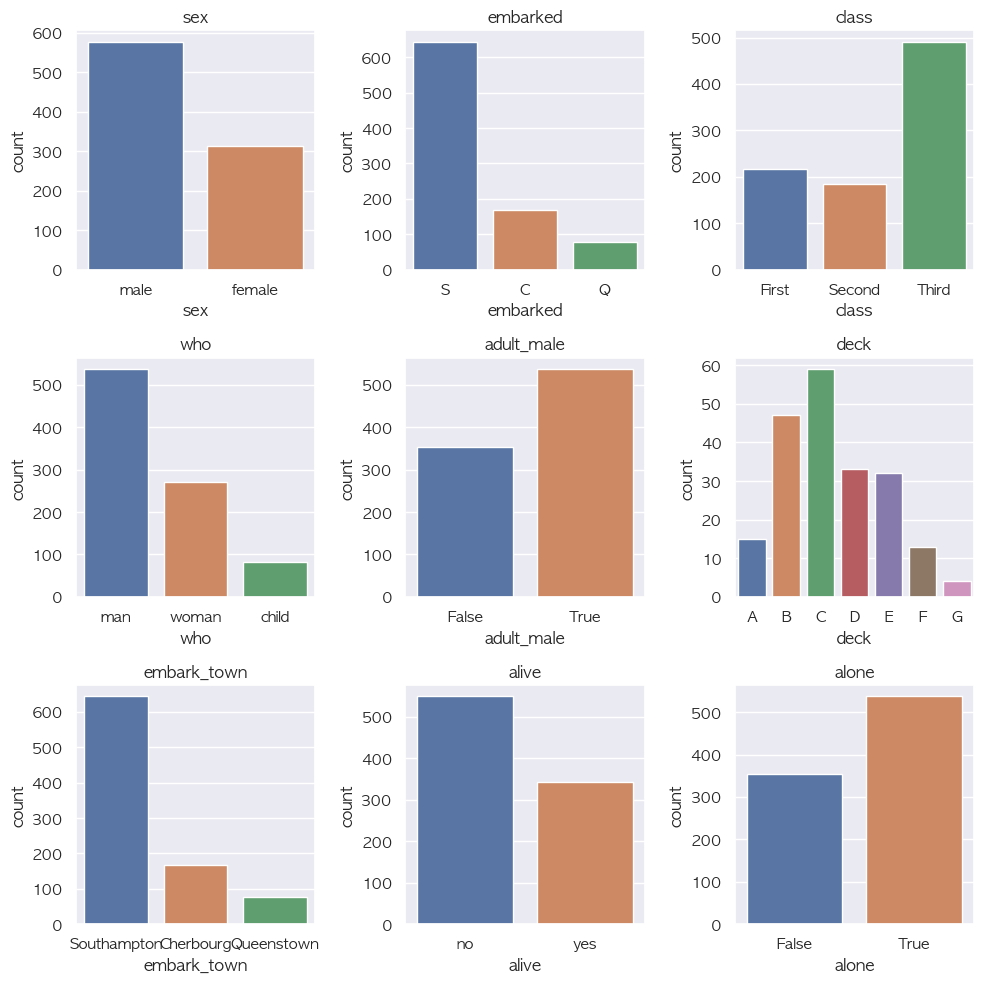

In [19]:
figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i])
    ax_list[i].set_title(col)

plt.tight_layout()
plt.show()

#### 데이터로부터 유의미한 정보 발굴하기  
사실, 여기서부터는 EDA의 범위를 넘어섭니다. 그래도 탑승객의 '생존'에 어떤 것들이 영향을 미치는지 궁금하시죠?  
몇 가지 가설을 세우고 그래프를 그려 '생존'에 영향을 미치는 요인이 무엇인지 살펴봅시다

In [20]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##### 성별과 생존 여부

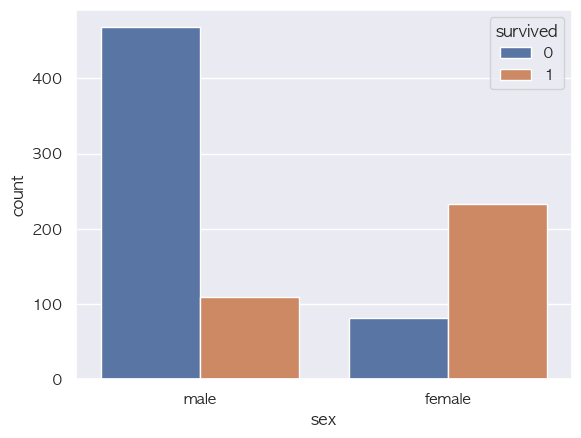

In [21]:
sns.countplot(data=titanic_df, x='sex', hue='survived');

##### 좌석 등급과 생존 여부

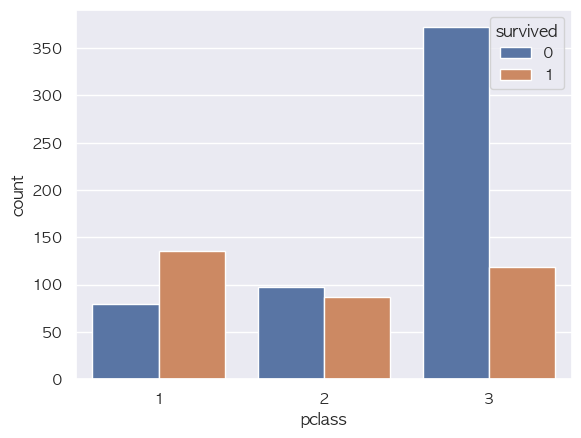

In [22]:
sns.countplot(data=titanic_df, x='pclass', hue='survived');

##### 9개의 범주형 분류에 대해, 생존 여부로 그래프 그리기

(3, 3)
(9,)


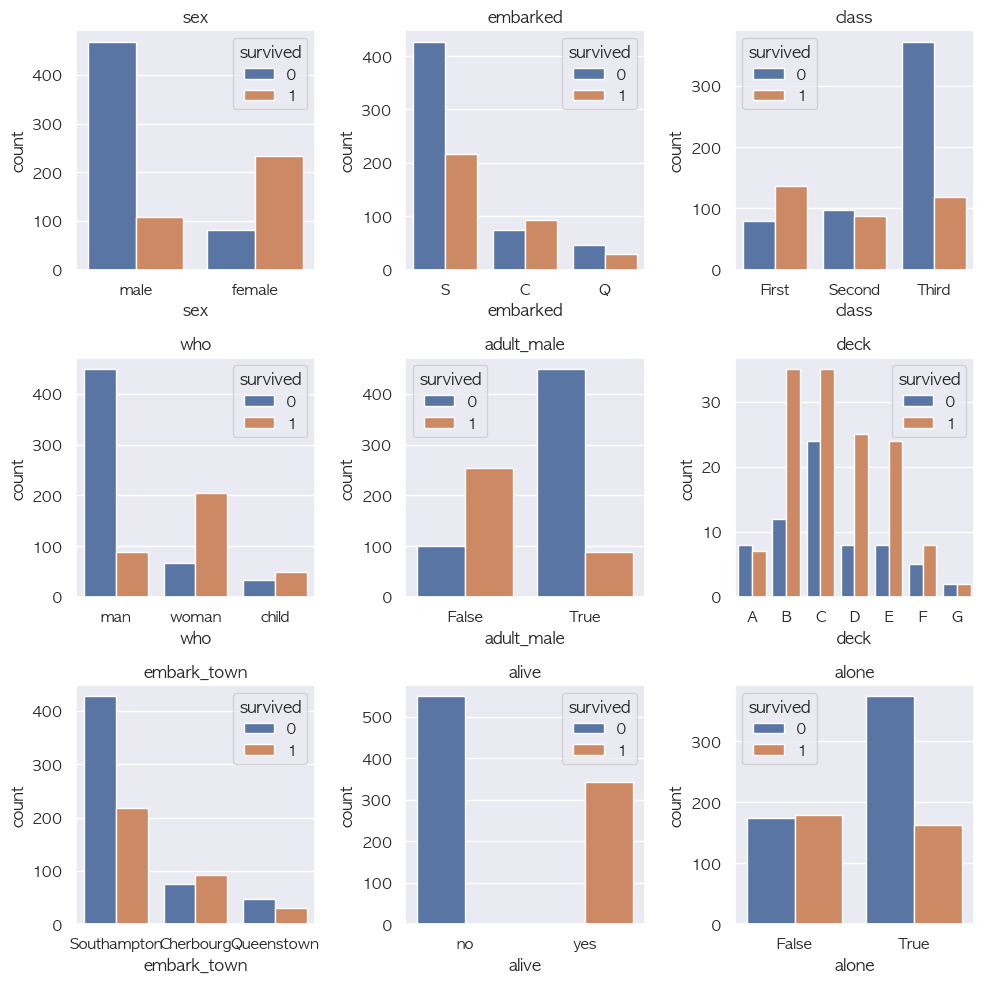

In [23]:
# hue 인자로 'survived' 컬럼을 입력, 각 분류형 데이터 별로 생존/사망 분리하여 살펴보기

figure, ax_list_list = plt.subplots(nrows=3, ncols=3);
figure.set_size_inches(10,10)

ax_list = ax_list_list.reshape(9)
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_cols)):
    col = category_cols[i]
    sns.countplot(data=titanic_df, x=col, ax=ax_list[i], hue='survived')
    ax_list[i].set_title(col)

plt.tight_layout()

- 남성보다 여성의 생존률이 더 높습니다  (남성 > 여성 > 아이)
- 탑승지(embarked)가 C인 경우 생존율이 높습니다
- 1등석 > 2등석 > 3등석 순으로 생존율이 높습니다
- B,D,E 덱 위치의 승객들이 생존율이 높습니다
- 나홀로 승객은 생존율이 낮습니다

##### 생존 여부별로 나이의 히스토그램 그려보기

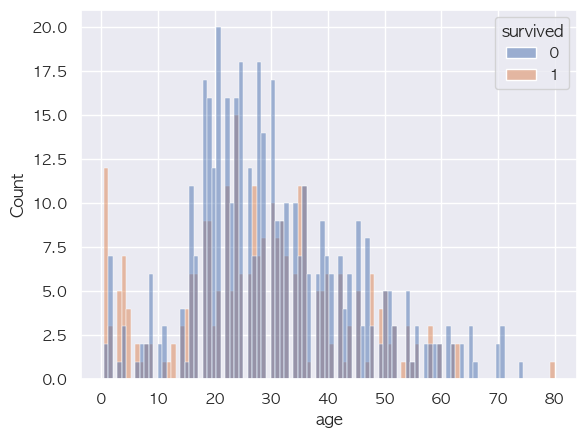

In [24]:
sns.histplot(data=titanic_df, x='age', hue='survived', bins=100, alpha=0.5);

##### 성별과 좌석 등급에 따라, 나이의 boxplot 그려보기

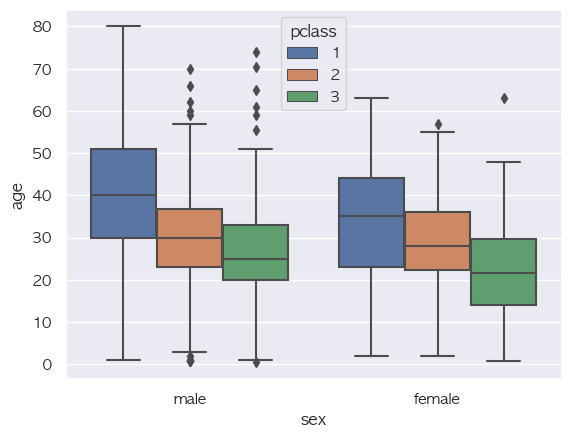

In [25]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass');

##### <연습문제 EDA 1>
성별과 좌석 등급에 따라, 운임료의 boxplot을 그려보세요 (극단 이상치 제외)

<Axes: xlabel='pclass', ylabel='fare'>

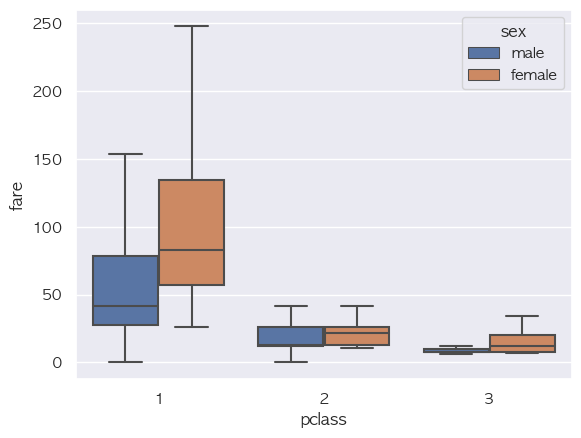

In [36]:
sns.boxplot(data=titanic_df, x='pclass', y='fare', hue='sex', showfliers=False)

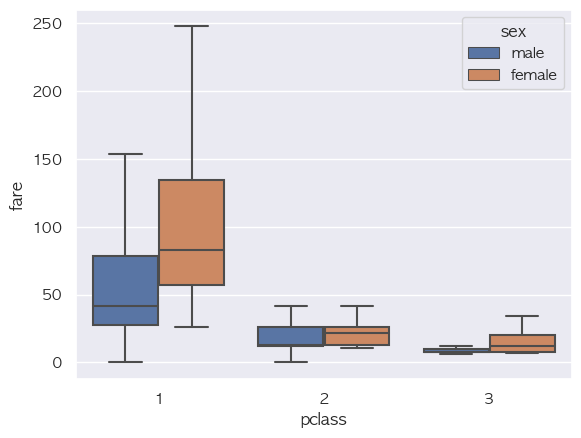

In [26]:
sns.boxplot(data=titanic_df, x='pclass', y='fare', hue='sex', showfliers=False);

##### 배우자+형제자매의 수, 생존 여부 별 나이의 boxplot

<Axes: xlabel='sibsp', ylabel='age'>

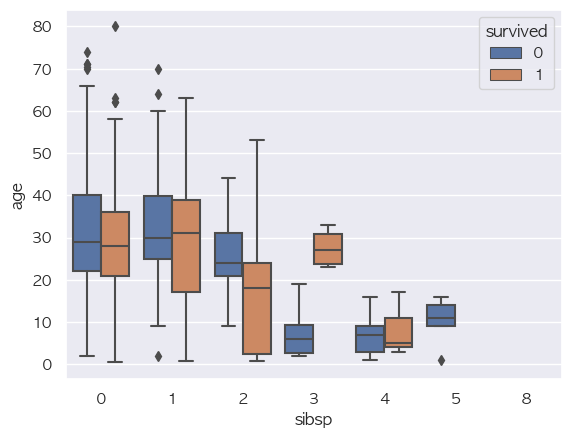

In [37]:
sns.boxplot(data=titanic_df, x='sibsp', y='age', hue='survived')

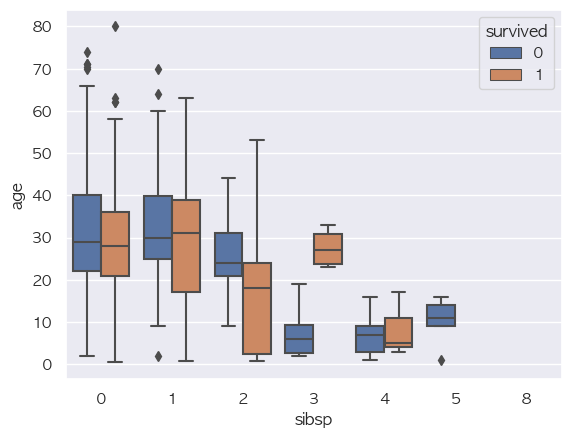

In [27]:
sns.boxplot(data=titanic_df, x="sibsp", y="age", hue='survived');

##### <연습문제 EDA 2>
부모+자녀의 수, 생존 여부 별 나이의 boxplot을 그려보세요

<Axes: xlabel='parch', ylabel='age'>

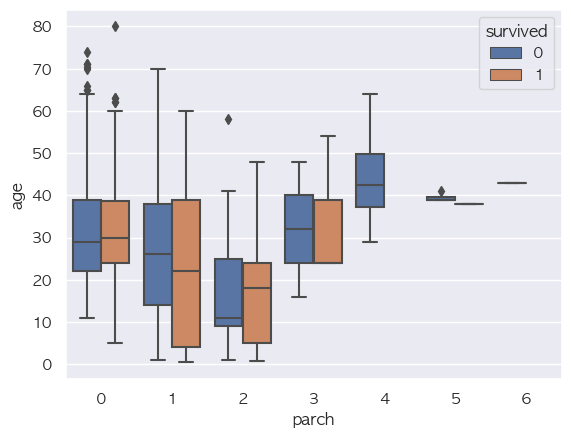

In [38]:
sns.boxplot(data=titanic_df, x='parch', y='age', hue='survived')

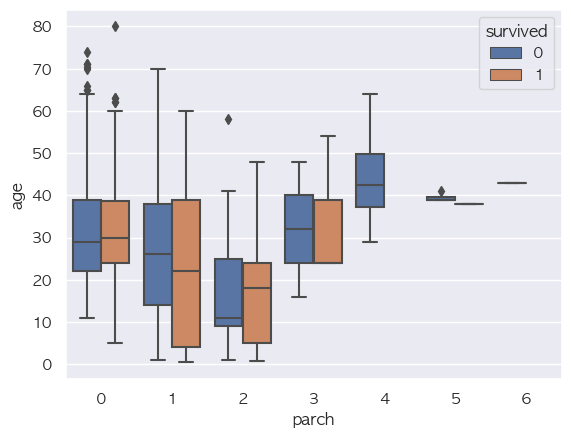

In [29]:
sns.boxplot(data=titanic_df, x="parch", y="age", hue='survived');

##### (심화) 출항지, 좌석 등급, 생존 여부 별  운임의 boxplot

In [30]:
titanic_df.survived.iloc[0]

0

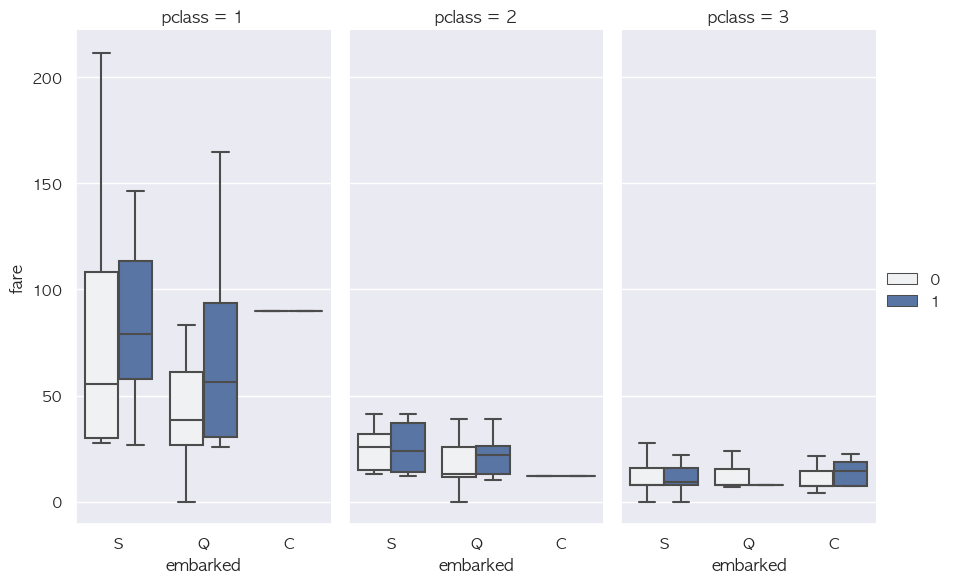

In [50]:
g = sns.FacetGrid(titanic_df, col='pclass', height=6, aspect=0.5)
g.map(sns.boxplot, 'embarked', 'fare', 'survived', showfliers=False)
g.add_legend()

##### FacetGrid
- 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 제작
- 각 서브 플롯에 적용할 그래프 종류를 map() 메서드를 이용하여 그리드 객체에 전달

1. FacetGrid에 데이터프레임과 구분할 row, col, hue 등을 전달해 객체 생성

2. 객체(facet)의 map 메서드에 그릴 그래프의 종류와 종류에 맞는 컬럼 전달
- 예시 - distplot의 경우 하나의 컬럼 // scatter의 경우 두개의 컬럼

`aspect * height` gives the width of each facet in inches.

`FacetGrid(df, 대분류, height, 너비)`   
`map(함수, x, y, hue, options)`
    
    - order: 속성 순서 나열

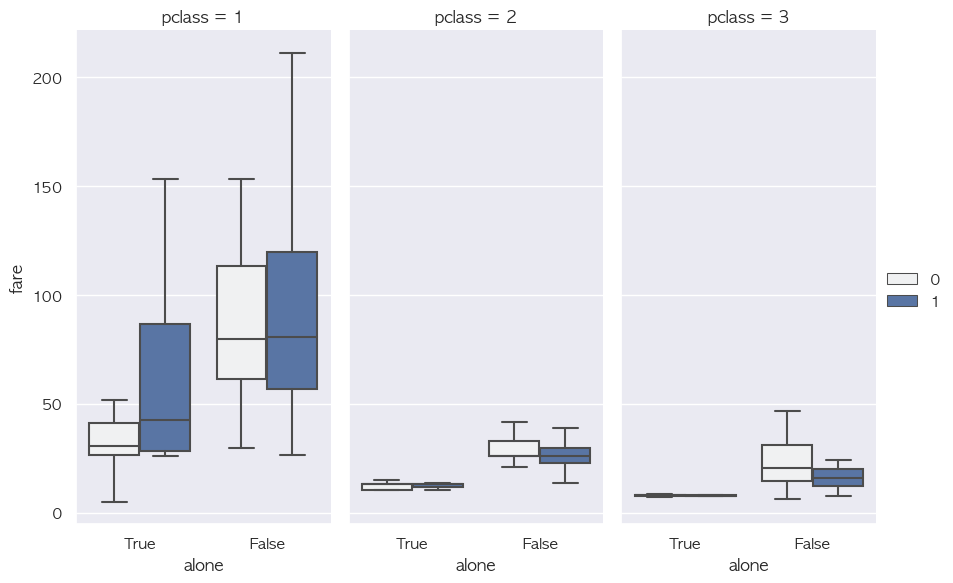

In [56]:
g = sns.FacetGrid(titanic_df, col='pclass', height=6, aspect=0.5)
g.map(sns.boxplot, 'alone', 'fare', 'survived', order=[True, False], hue_order=[0,1], showfliers=False);
g.add_legend();

##### <연습문제 EDA 3>
 (심화) 좌석 등급, 사람 구분, 생존 여부 별  나이의 boxplot을 그려보세요

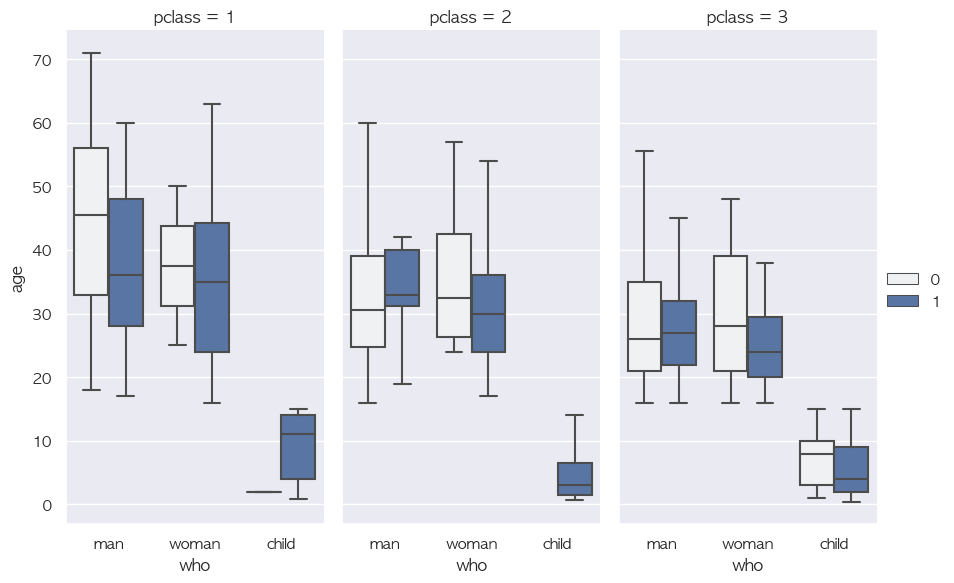

In [57]:
g = sns.FacetGrid(titanic_df, col='pclass', height=6, aspect=0.5)
g.map(sns.boxplot, 'who', 'age', 'survived', order=['man', 'woman', 'child'], hue_order=[0,1], showfliers=False)
g.add_legend()

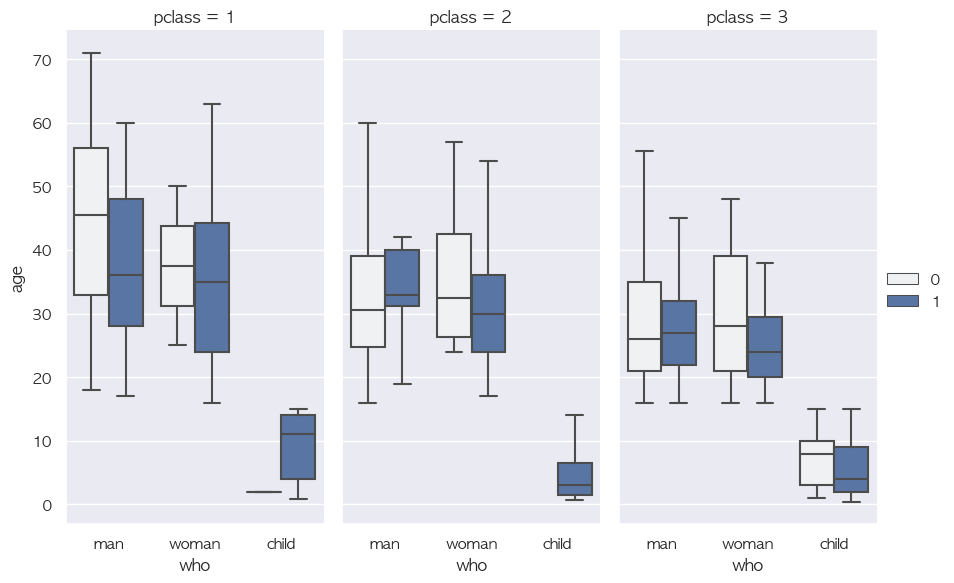

In [32]:
g = sns.FacetGrid(titanic_df, col='pclass', height=6, aspect=0.5);
g.map(sns.boxplot, 'who', 'age', 'survived', order=['man','woman','child'], hue_order=[0,1], showfliers=False);
g.add_legend();

### 이것으로 탐색적 데이터 분석, EDA에 대한 내용을 마무리 하겠습니다. 고생 많으셨습니다 :) <br/>추가적으로 새로운 컬럼을 생성하거나, 더 많은 차트로 생존율 예측 분석을 진행하셔도 좋습니다!